PROJET CY ANTIBIO TECH - CAMILLE GINDRE

On choisit de travailler sur un Notebook jupyter pour pouvoir insérer des blocs de titres et commentaires entre les blocs de codes.
Tous les blocs doivent être executés dans l'ordre pour que les données soient correctement valorisées pour l'ensemble du programme.

On importe la bibliothèque pandas pour disposer des fonctions d'analyses de données (manipulation de dataframes).
On charge le fichier de données 'data_real.csv' (qui doit être ici dans le même dossier que ce programme python).
On peut vérifier que le programme a bien lu le fichier de données avec la fonction head qui affiche les premieres lignes des données csv.

In [1]:
import pandas as pd

# load csv datafile
df = pd.read_csv('data_real.csv', sep=';')

# print DataFrame first lines to check content
df.head()

,mouse_strain,experiment_ID,sample_type,timepoint,mouse_ID,treatment,frequency_live_bacteria_%,experimental_day,counts_live_bacteria_per_wet_g,mouse_age_days,mouse_sex
0,NOD,AG6-222,fecal,treatment_start,ABX017,ABX,76.9,-7,1.110000e+10,14,male
1,NOD,AG6-222,fecal,treatment_start,ABX018,ABX,69.1,-7,3.830000e+09,14,male
2,NOD,AG6-222,fecal,treatment_start,ABX019,ABX,58.6,-7,5.360000e+09,14,male
3,NOD,AG6-222,fecal,treatment_start,ABX020,ABX,71.0,-7,1.510000e+09,14,male
4,NOD,AG6-222,fecal,treatment_start,ABX021,ABX,64.8,-7,7.510000e+09,14,female


On cherche le nombre de souris différentes via leurs IDs, en supprimant avant le préfixe ABX des IDs.
On se concentre sur la colonne 'mouse_ID' car c'est celle qu'on veut modifier.
On utilise la fonction replace qui remplace ABX par ''(un vide).

In [2]:
df['mouse_ID'] = df['mouse_ID'].str.replace('ABX', '')

On filtre dans un premier temps sur les données de type 'fecal' dans la colonne sample_type, en créant un nouveau dataframe "df_fecal".

In [3]:
df_fecal = df[df['sample_type'] == 'fecal']
df_fecal

,mouse_strain,experiment_ID,sample_type,timepoint,mouse_ID,treatment,frequency_live_bacteria_%,experimental_day,counts_live_bacteria_per_wet_g,mouse_age_days,mouse_sex
0,NOD,AG6-222,fecal,treatment_start,017,ABX,76.9,-7,1.110000e+10,14,male
1,NOD,AG6-222,fecal,treatment_start,018,ABX,69.1,-7,3.830000e+09,14,male
2,NOD,AG6-222,fecal,treatment_start,019,ABX,58.6,-7,5.360000e+09,14,male
3,NOD,AG6-222,fecal,treatment_start,020,ABX,71.0,-7,1.510000e+09,14,male
4,NOD,AG6-222,fecal,treatment_start,021,ABX,64.8,-7,7.510000e+09,14,female
...,...,...,...,...,...,...,...,...,...,...,...
90,NOD,AG6-222,fecal,washout_day4,024,ABX,88.6,4,4.380000e+09,25,female
91,NOD,AG6-222,fecal,washout_day4,025,placebo,71.8,4,1.410000e+10,25,male
92,NOD,AG6-222,fecal,washout_day4,026,placebo,68.6,4,2.240000e+10,25,male
93,NOD,AG6-222,fecal,washout_day4,030,placebo,71.0,4,1.360000e+10,25,female


On sépare deux séries de données selon le type de traitement ABX et placebo, et on trace les graphes de nbre de bactéries par gramme en fonction de experimental_day.
Pour cela, on importe la bibliothèque matplotlib.pyplot (alias plt) et numpy pour tracer un graphique segment.
On fait des boucles pour que chaque type de souris corresponde à un segment du graphique pour le groupe ABX et le groupe placebo. On paramètre l'abscisse, l'ordonnée, la couleur de chaque série via la fonction "plot".
On reconnait le groupe placebo en bleu et abx en rouge en ajoutant une légende avec plt.plot.

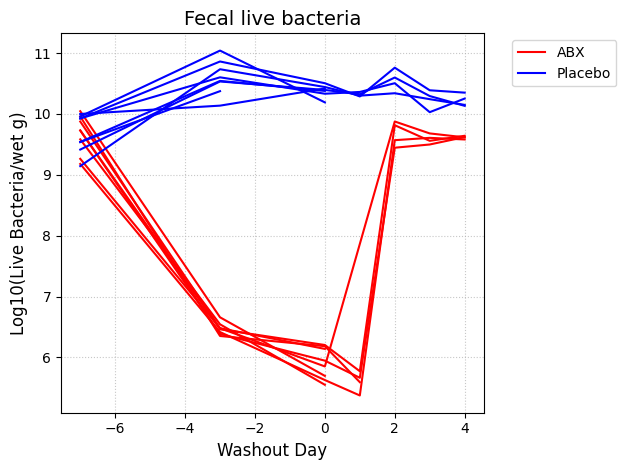

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

df_abx = df_fecal[df_fecal['treatment'] == 'ABX']
df_placebo = df_fecal[df_fecal['treatment'] == 'placebo']

# Create figure
plt.figure

# Plot log values for each mouse in ABX group
for mouse_id in df_abx['mouse_ID'].unique():
    mouse_data = df_abx[df_abx['mouse_ID'] == mouse_id]
    plt.plot(mouse_data['experimental_day'], np.log10(mouse_data['counts_live_bacteria_per_wet_g']), linestyle='-', color='red')

# Plot log values for each mouse in placebo group
for mouse_id in df_placebo['mouse_ID'].unique():
    mouse_data = df_placebo[df_placebo['mouse_ID'] == mouse_id]
    plt.plot(mouse_data['experimental_day'], np.log10(mouse_data['counts_live_bacteria_per_wet_g']), linestyle='-', color='blue')

# Customize plot
plt.xlabel('Washout Day', fontsize=12)
plt.ylabel('Log10(Live Bacteria/wet g)', fontsize=12)
plt.title('Fecal live bacteria', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.7)

# Add legend
plt.plot([], [], linestyle='-', color='red', label='ABX')
plt.plot([], [], linestyle='-', color='blue', label='Placebo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Show plot
plt.show()

On passe aux données de type 'ileal':
on filtre les données de la colonne sample_type pour n'avoir que ileal et plus fecal et cecal, en créant un nouveau dataframe "df_ileal".
Puis on importe une bibliothèque seaborn pour les diagramme avec statistiques (ici on veut des diagrammes violon qui montrent la dispersion des données).

In [5]:
df_ileal = df[df['sample_type'] == 'ileal']
df_ileal

,mouse_strain,experiment_ID,sample_type,timepoint,mouse_ID,treatment,frequency_live_bacteria_%,experimental_day,counts_live_bacteria_per_wet_g,mouse_age_days,mouse_sex
34,NOD,AG6-222,ileal,treatment_end,017,ABX,0.56,0,6.640000e+05,21,male
37,NOD,AG6-222,ileal,treatment_end,018,ABX,0.61,0,4.980000e+05,21,male
43,NOD,AG6-222,ileal,treatment_end,022,ABX,2.22,0,1.340000e+06,21,female
47,NOD,AG6-222,ileal,treatment_end,024,ABX,12.40,0,6.790000e+07,21,female
51,NOD,AG6-222,ileal,treatment_end,027,placebo,37.70,0,1.010000e+10,21,male
54,NOD,AG6-222,ileal,treatment_end,028,placebo,16.50,0,2.040000e+08,21,male
57,NOD,AG6-222,ileal,treatment_end,029,placebo,8.36,0,3.290000e+06,21,female
61,NOD,AG6-222,ileal,treatment_end,031,placebo,17.40,0,1.560000e+08,21,female


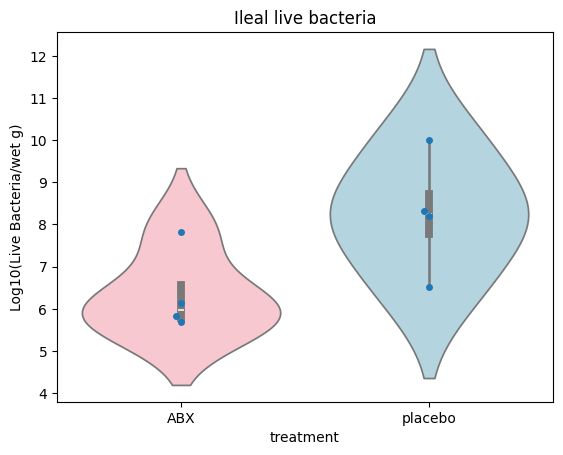

In [6]:
import seaborn as sns

# Create violin plot
plt.figure
sns.violinplot(x='treatment', y=np.log10(df_ileal['counts_live_bacteria_per_wet_g']), hue='treatment', data=df_ileal, palette=['pink', 'lightblue'], legend=False)
sns.swarmplot(x='treatment', y=np.log10(df_ileal['counts_live_bacteria_per_wet_g']), data=df_ileal)

# Customize plot
plt.title('Ileal live bacteria')
plt.ylabel('Log10(Live Bacteria/wet g)')
plt.xlabel('treatment')

# Show plot
plt.show()

On passe aux données de type 'Cecal': même principe que précédemment

In [7]:
df_cecal = df[df['sample_type'] == 'cecal']
df_cecal

,mouse_strain,experiment_ID,sample_type,timepoint,mouse_ID,treatment,frequency_live_bacteria_%,experimental_day,counts_live_bacteria_per_wet_g,mouse_age_days,mouse_sex
32,NOD,AG6-222,cecal,treatment_end,017,ABX,2.60,0,1.150000e+06,21,male
35,NOD,AG6-222,cecal,treatment_end,018,ABX,1.99,0,9.880000e+05,21,male
41,NOD,AG6-222,cecal,treatment_end,022,ABX,0.89,0,9.280000e+05,21,female
45,NOD,AG6-222,cecal,treatment_end,024,ABX,1.56,0,1.320000e+06,21,female
50,NOD,AG6-222,cecal,treatment_end,027,placebo,18.30,0,1.560000e+10,21,male
52,NOD,AG6-222,cecal,treatment_end,028,placebo,30.50,0,3.410000e+10,21,male
55,NOD,AG6-222,cecal,treatment_end,029,placebo,32.90,0,3.380000e+10,21,female
59,NOD,AG6-222,cecal,treatment_end,031,placebo,23.70,0,2.300000e+10,21,female


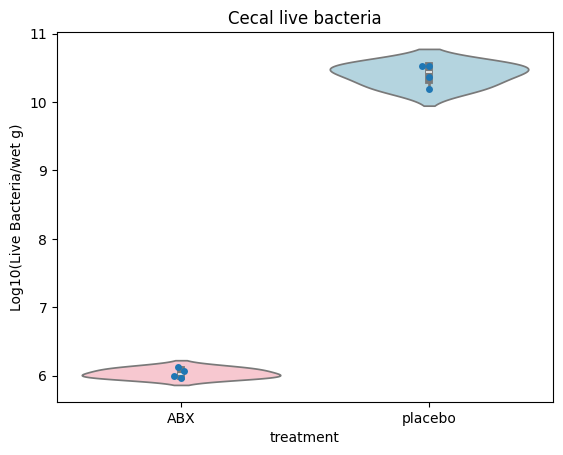

In [8]:
import seaborn as sns

# Create violin plot
plt.figure
sns.violinplot(x='treatment', y=np.log10(df_cecal['counts_live_bacteria_per_wet_g']), hue='treatment', data=df_cecal, palette=['pink', 'lightblue'], legend=False)
sns.swarmplot(x='treatment', y=np.log10(df_cecal['counts_live_bacteria_per_wet_g']), data=df_cecal)

# Customize plot
plt.title('Cecal live bacteria')
plt.ylabel('Log10(Live Bacteria/wet g)')
plt.xlabel('treatment')

# Show plot
plt.show()
